In [ ]:
!pip install ace-tools

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score, davies_bouldin_score
from datetime import datetime
import re
from datetime import datetime, timedelta
import random
from IPython.display import display
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from datetime import timedelta

In [ ]:
df_erigo_tokped = pd.read_csv('/content/drive/MyDrive/DataMining/modularisasi/data/raw/Erigo_full_data.csv')
df_erigo_tokped.head(10)

,Harga Produk,Jumlah Terjual,Jumlah Ulasan,Kategori,Nama Produk,Nama Toko,Rating,Rating Produk,Rating Toko,Tanggal Komentar,Teks Ulasan,Username
0,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,"sesuai deskripsi, bahan adem, ukiran pas bange...",A***a
1,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,"bagus tapi ya sesuai harga 45, berharap kaos s...",B***i
2,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,"Ukuran pas, bahan lumayan",R***r
3,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Menurut saya ini sangat jelek bahan panas,B***m
4,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Kualitas produk: Bagus,B***t
5,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,bagus dan pas bgt,H***c
6,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Nyaman,M***l
7,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Barang bagus,D***i
8,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Barang ok,W***l
9,Rp51.999,100+,29,Home > Fashion Pria > Atasan Pria > Kaos Pria,Erigo T-Shirt Embro Vanderson Maroon - Kaos Un...,Erigo Store,5,4.8,-,-,Sesuai harga☺,V***d


In [11]:
row = df_erigo_tokped.shape
print("baris dan kolom data :", row)

baris dan kolom data : (585, 12)


In [12]:
colums = df_erigo_tokped.columns.tolist()
print("kolom data :", colums)

kolom data : ['Harga Produk', 'Jumlah Terjual', 'Jumlah Ulasan', 'Kategori', 'Nama Produk', 'Nama Toko', 'Rating', 'Rating Produk', 'Rating Toko', 'Tanggal Komentar', 'Teks Ulasan', 'Username']


In [13]:
typedata = df_erigo_tokped.dtypes.to_dict()
print("tipe data :", typedata)

tipe data : {'Harga Produk': dtype('O'), 'Jumlah Terjual': dtype('O'), 'Jumlah Ulasan': dtype('O'), 'Kategori': dtype('O'), 'Nama Produk': dtype('O'), 'Nama Toko': dtype('O'), 'Rating': dtype('O'), 'Rating Produk': dtype('O'), 'Rating Toko': dtype('O'), 'Tanggal Komentar': dtype('O'), 'Teks Ulasan': dtype('O'), 'Username': dtype('O')}


In [14]:
missingValue = df_erigo_tokped.isnull().sum()
print("missing value :", missingValue)

missing value : Harga Produk         0
Jumlah Terjual       0
Jumlah Ulasan        0
Kategori            10
Nama Produk          0
Nama Toko            0
Rating               0
Rating Produk        0
Rating Toko          0
Tanggal Komentar     0
Teks Ulasan          0
Username             0
dtype: int64


In [15]:
duplikatRows = df_erigo_tokped.duplicated().sum()
print("duplikat rows :", duplikatRows)

duplikat rows : 0


In [20]:
#korelasi antar variabel
df_eda = df_erigo_tokped.replace("-", np.nan).copy()
# Hapus kolom Rating Toko
df_eda = df_eda.drop(columns=["Rating Toko"])
df_eda = df_eda.drop(columns=["Nama Toko"])
# Konversi Tanggal Komentar ke datetime
df_eda['Tanggal Komentar'] = pd.to_datetime(df_eda['Tanggal Komentar'], errors='coerce')
# Isi nilai NaT (kosong) dengan tanggal dummy acak dalam rentang 1 tahun terakhir
mask_null_date = df_eda['Tanggal Komentar'].isnull()
num_missing_dates = mask_null_date.sum()
# Buat tanggal acak dalam range 1 tahun ke belakang dari hari ini
random_dates = [datetime.today() - timedelta(days=np.random.randint(0, 365)) for _ in range(num_missing_dates)]
df_eda.loc[mask_null_date, 'Tanggal Komentar'] = random_dates
# Cek hasil akhir
df_eda[['Tanggal Komentar']].head(10)

/tmp/ipython-input-20-3008700350.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_eda = df_erigo_tokped.replace("-", np.nan).copy()
/tmp/ipython-input-20-3008700350.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_eda['Tanggal Komentar'] = pd.to_datetime(df_eda['Tanggal Komentar'], errors='coerce')


,Tanggal Komentar
0,2024-09-17 16:55:26.011398
1,2024-12-20 16:55:26.011483
2,2024-10-30 16:55:26.011499
3,2024-11-17 16:55:26.011508
4,2025-04-26 16:55:26.011517
5,2025-01-14 16:55:26.011525
6,2024-12-15 16:55:26.011533
7,2025-04-22 16:55:26.011542
8,2025-02-17 16:55:26.011552
9,2025-02-10 16:55:26.011560


/tmp/ipython-input-32-2922971645.py:51: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


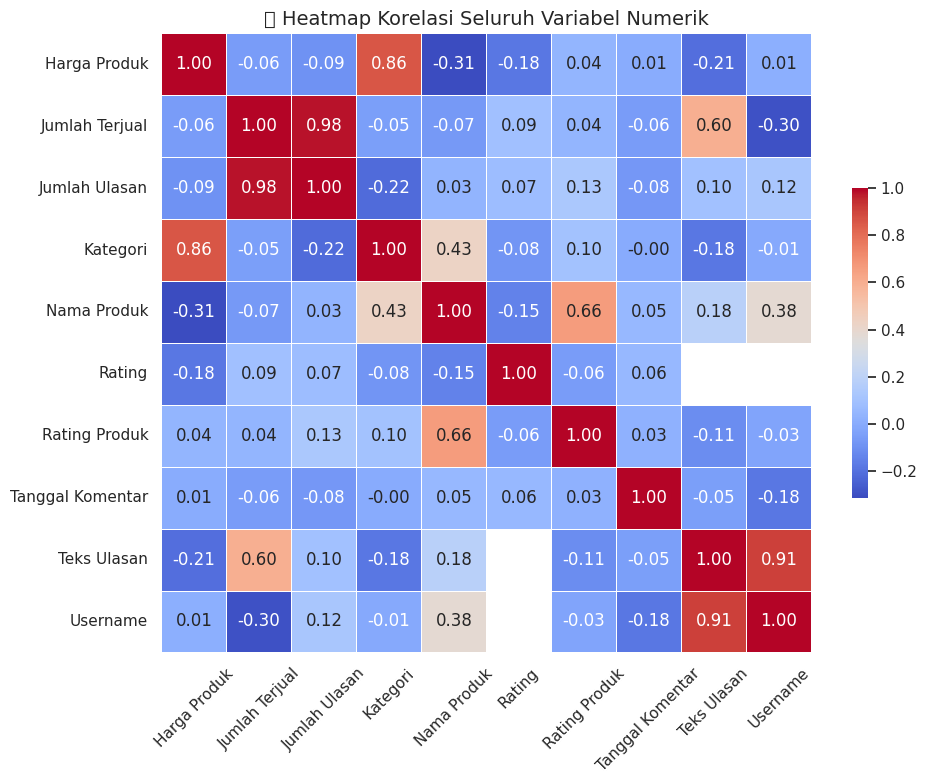

In [32]:
# Salin dataframe EDA yang telah dibersihkan sebelumnya
df_all_numeric = df_eda.copy()
le_kategori = LabelEncoder()

df_all_numeric['Kategori'] = le_kategori.fit_transform(df_eda['Kategori'].astype(str))

# Konversi Rating dan Rating Produk ke float secara eksplisit
df_all_numeric['Rating'] = pd.to_numeric(df_eda['Rating'], errors='coerce')
df_all_numeric['Rating Produk'] = pd.to_numeric(df_eda['Rating Produk'], errors='coerce')

# Isi nilai kosong di Rating dengan rata-rata Rating Produk
mean_rating_produk = df_all_numeric['Rating Produk'].mean()
df_all_numeric['Rating'] = df_all_numeric['Rating'].fillna(mean_rating_produk)

if 'Nama Toko' in df_all_numeric.columns:
    df_all_numeric = df_all_numeric.drop(columns=['Nama Toko'])

# Buat fungsi numerik general untuk membersihkan string jadi angka
def clean_numeric_general(col):
    col = col.astype(str)
    col = col.str.replace(r'[^\d.,]', '', regex=True)  # Hapus karakter non-angka
    col = col.str.replace(',', '.', regex=False)  # Ganti koma jadi titik jika ada
    col = pd.to_numeric(col, errors='coerce')
    return col

# Terapkan konversi numerik ke semua kolom object (kecuali tanggal)
for col in df_all_numeric.columns:
    if df_all_numeric[col].dtype == 'object':
        df_all_numeric[col] = clean_numeric_general(df_all_numeric[col])

# Ubah tanggal ke bentuk numerik (timestamp)
df_all_numeric['Tanggal Komentar'] = df_all_numeric['Tanggal Komentar'].astype('int64') // 10**9  # dalam detik

# Hitung korelasi semua kolom numerik
correlation_all = df_all_numeric.corr(method='pearson')

# Tampilkan heatmap semua variabel
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_all,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=False,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)
plt.title("🔥 Heatmap Korelasi Seluruh Variabel Numerik", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()